#### 3.7 추정

##### 3.7.1 분석 준비

In [237]:
fish = pd.read_csv("3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

##### 3.7.2 점추정
- 점추정이란 모수를 어느 1개의 값으로 추정
- 모평균의 추정값으로 표본평균을 사용(불편성, 일치성)

In [239]:
# 모평균의 점추정(표본평균 계산)
mu = np.mean(fish)
mu

4.187039324504523

In [241]:
# 불편분산으로 모분산의 점추정
sigma_2 = np.var(fish, ddof = 1)
sigma_2

0.6803017080832622

##### 3.7.3 구간추정
- 추정 값이 폭을 가지게 함
- 추정 오차가 작거나 샘플사이즈 커지면 구간 추정의 폭이 좁아짐

##### 3.7.4 신뢰계수와 신뢰구간
- 신뢰계수:구간추정의 폭에 대한 신뢰 정도를 확률로 표현 ex.95%, 99%
- 신뢰 구간:특정 신뢰계수를 만족하는 구간
- 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐

##### 3.7.5 신뢰한계
- 신뢰한계란  신뢰구간의 하한값과 상한값
- 각각 하측신뢰한계, 상측신뢰한계라고 함

##### 3.7.6 신뢰구간 계산 방법
- 구간추정시 t분포의 퍼센트포인트를 사용
- 신뢰계수를 95%라고 했을 때, t분포 따르면 2.5%지점과 97.5%지점을 계산하고 이 구간을 사용

##### 3.7.7 구간추정(실습)
- 구간 추정에 필요한 정보:자유도(N-1), 표본평균, 표준오차

In [242]:
# 자유도
df = len(fish) - 1
df

9

In [244]:
# 표준오차
sigma = np.std(fish, ddof = 1)
se = sigma / np.sqrt(len(fish))
se

0.2608259396768776

In [246]:
# 위의 정보들로 신뢰구간 계산
# 신뢰계수 alpha, 자유도 df, 표본평균 loc, 표준오차 scale
interval = stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se)
interval

(3.597010056835825, 4.777068592173221)

##### 3.7.8 신뢰구간을 구하는 방법
- stats.t.interval() 함수 쓰자..!!
##### 3.7.9 신뢰구간의 폭을 결정하는 요소
- 표본의 분산 크기가 크면 신뢰구간의 폭이 넓어진다
- 샘플사이즈가 커지면 신뢰구간의 폭이 좁아진다

In [249]:
# 표본표준편차를 10배로 늘려서 신뢰구간 계산
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se2)

(-1.7132533521824618, 10.087332001191509)

In [251]:
# 샘플사이즈 10배로 늘려서 신뢰구간 계산
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.95, df = df2, loc = mu, scale = se3)

(4.0233803082774395, 4.350698340731607)

##### 3.7.10 구간추정 결과의 해석
- 신뢰계수 95%의 95%는 어떻게 얻을까?
1. 원래 모집단분포에서 표본을 추출합니다
2. 이번에도 같은 방법으로 95% 신뢰구간을 계산합니다
3. 이 시행을 여러 번 반복합니다
4. 모든 시행 중 원래 모집단이 신뢰구간에 포함되는 비율이 95%입니다
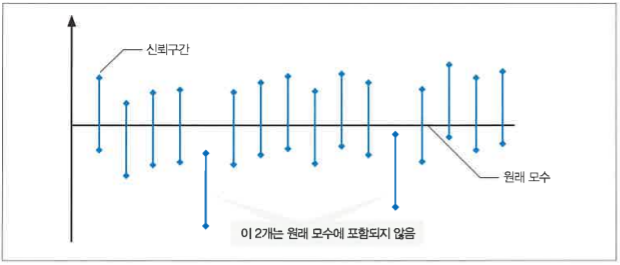

In [252]:
# 신뢰구간이 모평균(4)을 포함하면 True가 되는 변수
be_included_array = np.zeros(20000, dtype = "bool")
be_included_array

array([False, False, False, ..., False, False, False])

In [ ]:
# 95% 신뢰구간을 구하는 시행을 20000번 반복한다
# 신뢰구간이 모평균(4)을 포함하면 True
np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 20000):
    sample=norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof = 1)
    se  = std / np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if (interval[0] <= 4 and interval[1] >=4):
        be_included_array[i] = True

In [ ]:
# 신뢰구간이 모평균(4)을 포함한 비율
sum(be_included_array) / len(be_included_array)